<a href="https://colab.research.google.com/github/viriditass/Papers/blob/main/Semantic_Image_Synthesis_with_Spatially_Adaptive_Normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Semantic Image Synthesis with Spatially-Adaptive Normalization**

논문 링크: https://arxiv.org/abs/1903.07291

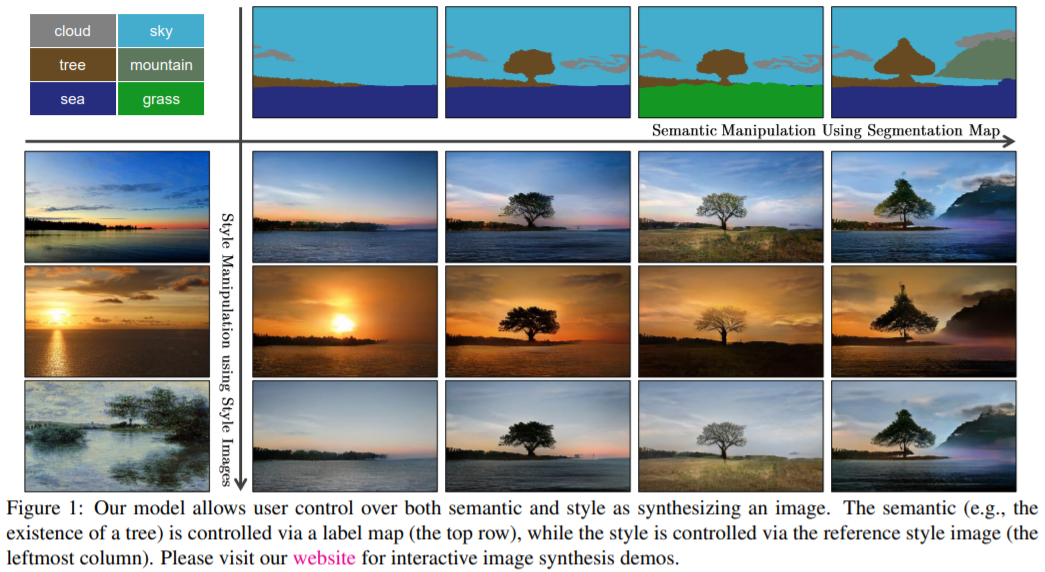

위의 그림 Figure 1은 GauGAN의 결과물을 보여준다. 사용자가 직접 커스텀한 segmentation mask를 통해 모델이 해당 style image를 렌더링하는 것이다.

## **GauGAN 구조**

그러면 GauGAN은 어떻게 위와 같은 놀라운 결과물을 만들어냈을까?

먼저 GauGAN의 핵심 아이디어인 SPADE에 대해 알아보겠다.

### **SPADE(Spatially-adaptive denormalization)**

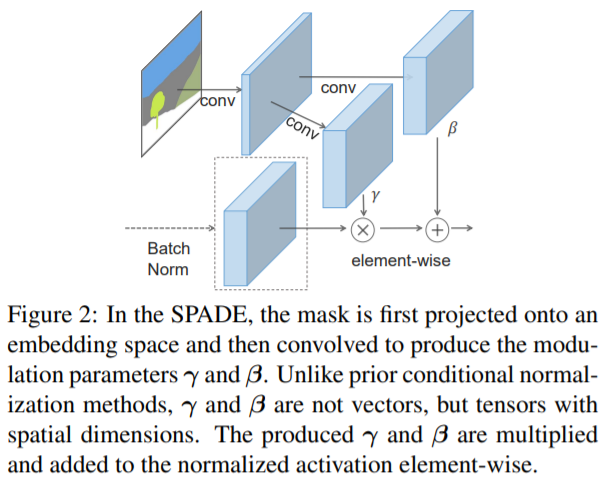

위의 그림 Figure 2는 **SPADE(Spatially-adaptive denormalization)**의 구조를 보여준다.

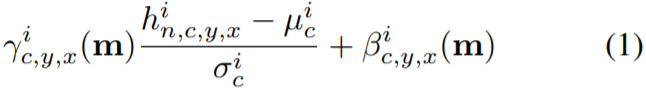

위 식에서 h^i는 i번째 layer의 activation을 나타내고 n은 sample 수이고 c, h, w는 각각 channel 수, 높이, 너비를 나타낸다. 위 식에서 h^i_n,c,y,x는 normalization에 들어가기 전 activation이며,

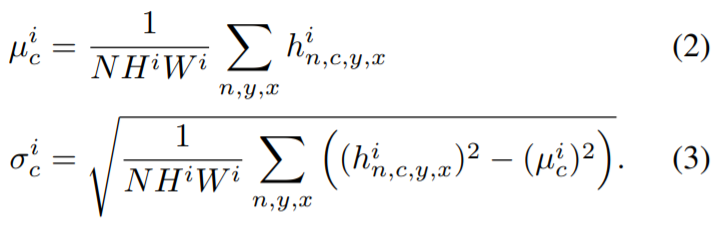

µ^i_c와 σ^i_c는 BN 관련 논문을 봤다면 바로 알 수 있듯이 각각 채널 c에 대한 평균과 표준 편차이다.

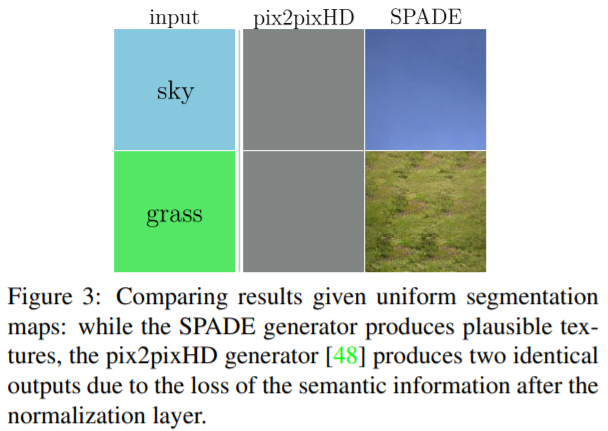

위의 그림 Figure 3에서는 두 개의 uniform segmentation map를 pix2pixHD와 SPADE에게 input으로 주었을 때 결과를 비교한 것이다. SPADE는 그럴듯한 texture를 생성하는 반면, pix2pixHD는 normalization layer 이후에 정보를 손실하여 동일한 output을 생성해낸다.

이러한 결과물의 차이에 대한 원인은 **SPADE가 일반적인 normalization layer들에 비해 의미있는 semmantic information을 더욱 잘 보존**할 수 있기 때문이다. 특히 IN과 같은 normalization layer들의 위의 그림 Figure 3과 같이 경우 균일(uniform)하거나 평평한(flat) semantic mask에 적용될 시 의미있는 정보를 제거하는 경향이 있다.

### **Generator 구조**

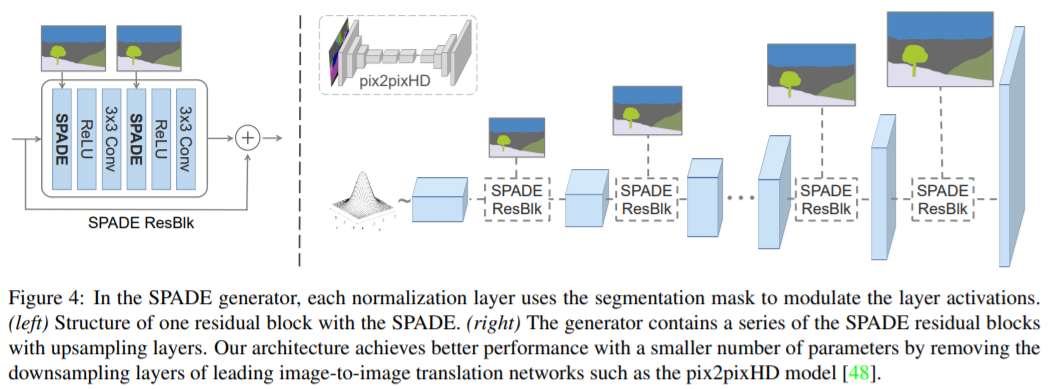

위의 그림 Figure 4는 GauGAN generator의 구조를 보여준다. **SPADE(Spatially Adaptive Normalization)** 블록으로 구성된 fully convolutional decoder이다.

GauGAN의 generator와 Pix2PixHD의 아키텍처에는 큰 차이가 있는데, 첫번째로 본 논문의 저자는 각 SPADE 블록에 대한 입력으로 semanic segmentation map을 직접 제공하도록 하기 때문에 down-sampling이 없다. 

두번째로 Pix2PixHD와 달리 up-sampling은 transpose convolutional layer를 사용하신 대신 가장 가까운 이웃(nearest neighbour) 크기 조정에 의해 이루어진다. **transpose convolutional layer는 image에서 바둑판 artifact를 만들기 생성하기 쉽기 때문에 많은 정보를 잃게** 된다. 따라서 본 논문의 저자는 단순히 이러한 추세를 따라 **non-learnable upsampling**를 사용했다.

## **Experiments**

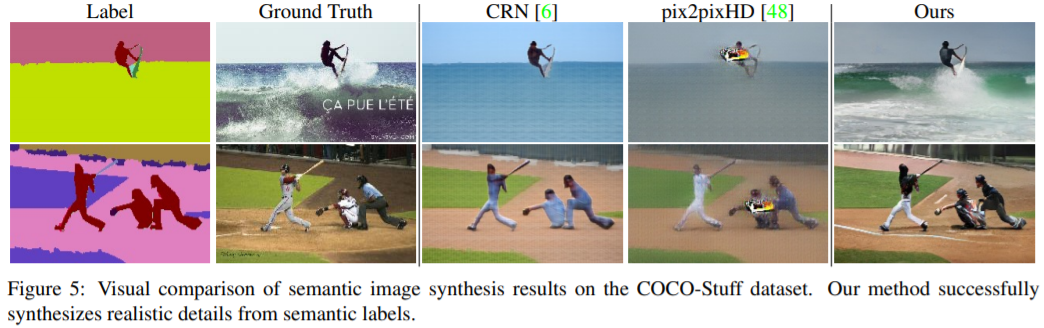

위의 그림 Figure 5는 COCO-Stuff dataset에 대해 GauGAN과 타 모델들과의 결과물을 비교한다.

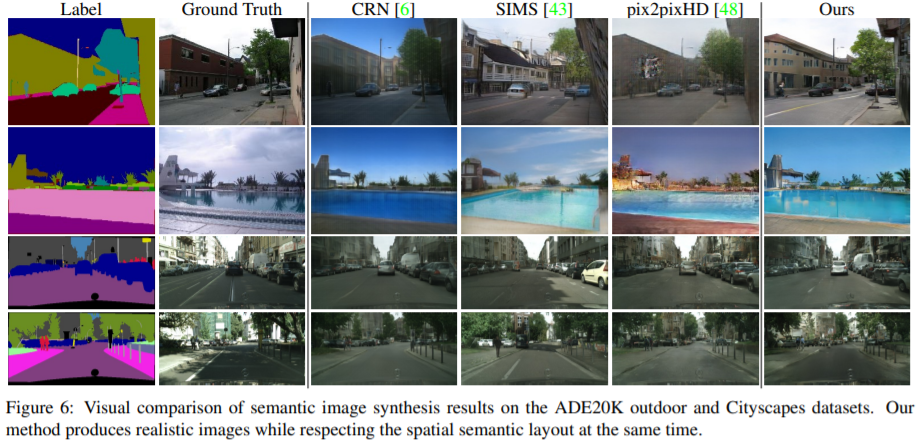

위의 그림 Figure 6은 ADE20K dataset에 대해 figure 5와 같이 타 모델과의 결과물을 비교한 것이다.

GauGAN이 타 모델에 비해 더 나은 시각적 품질과 더 적은 visible artifacts로 결과물을 만들어내는 것을 알 수 있다.

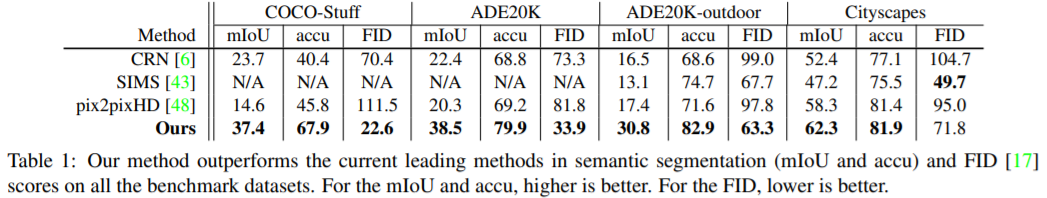

위의 표 Table 1은 성능 지표를 통해 타 모델들과 비교를 한 것인데, GauGAN이 여러 지표에서 state-of-the-art 성능을 보여준다. COCO-Stuff의 경우, mIoU 값이 이전보다 약 1.5배나 우수하며 FID는 2.2배 우수하다. SIMS가 더 낮은 FID 점수를 받지만 Cityscapes dataset에 대해 segmentation 성능이 매우 떨어진다.

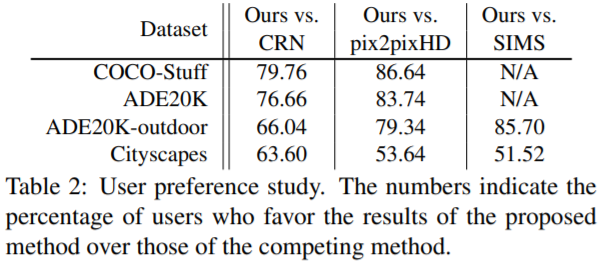

위의 표 Table 2는 사용자에 대한 선호도 비율을 나타낸 것이다. 사용자는 모든 dataset에 대해 GauGAN을 더욱 선호하는 것을 알 수 있다.

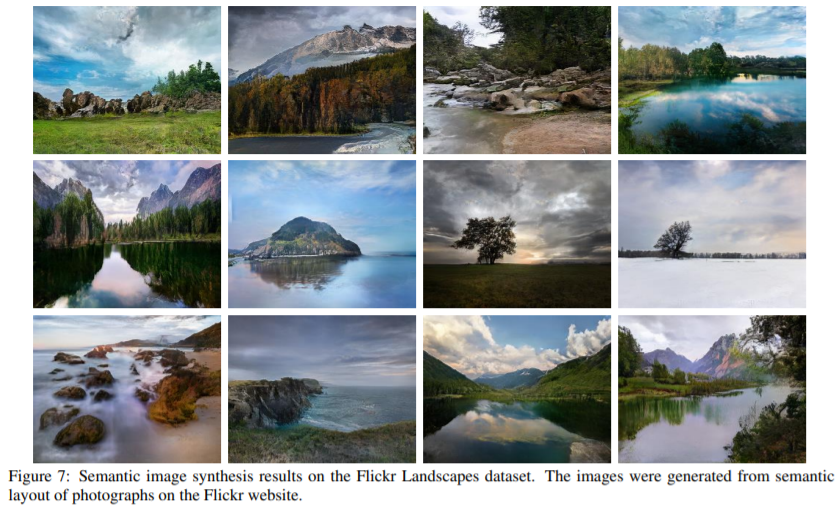

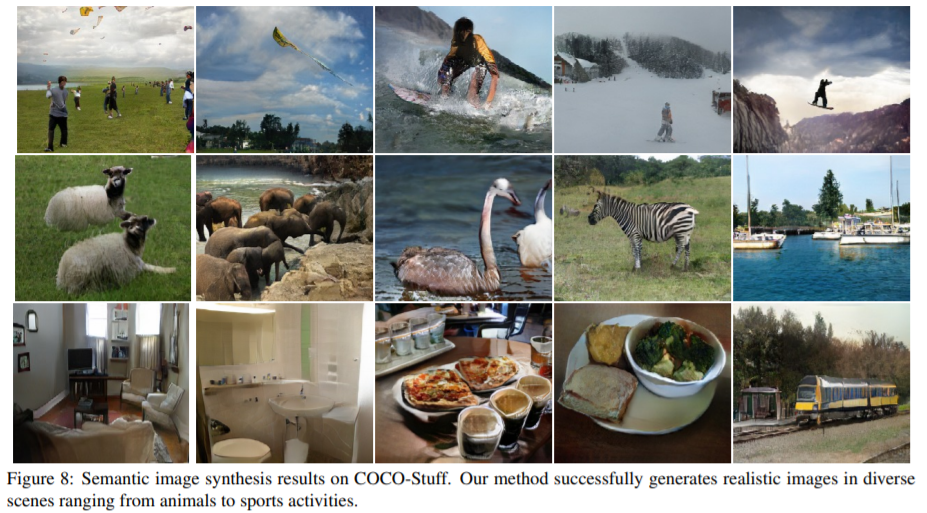

위의 그림들 Figure 7과 Figure 8은 Flickr Landscapes dataset과 COCO-Stuff dataset의 더 많은 결과물을 보여준다.

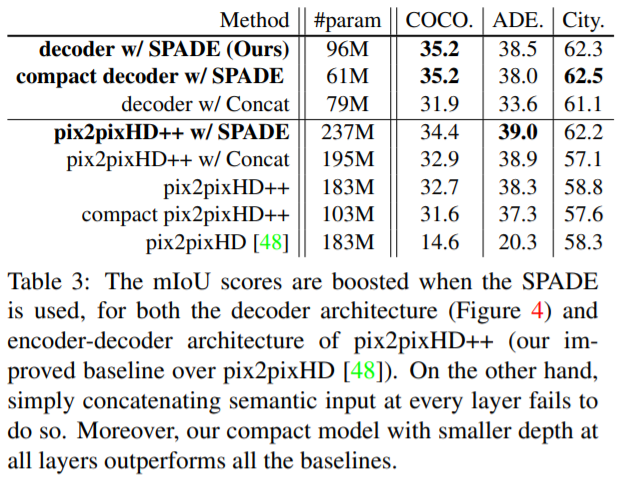

위의 표 Table 3을 보면 SPADE에서 사용된 architecture가 기존의 전통적인 encoder-decoder 방식의 architecture보다 뛰어난 것을 알 수 있다.

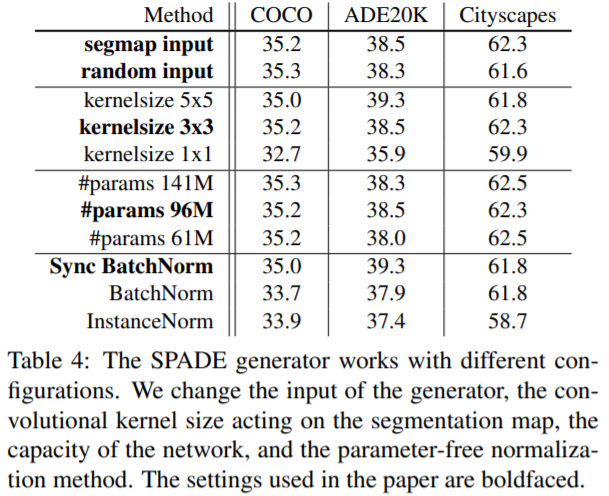

위의 표 Table 4는 generator에 다양한 변화를 준 결과를 보여준다. 먼저, segmap input과 random input의 경우 둘다 유사한 성능을 렌더링하고 SPADE에 의한 변조만으로도 input mask에 대한 충분한 signal을 제공할 수 있다고 결론을 내렸다.

두번째로 kernel size를 변경하였는데, 1x1 convolution이 label context 사용을 막기 때문에 성능이 저하가 되는 것을 알 수 있다.

마지막으로 param과 normalization의 경우 생략하겠다.

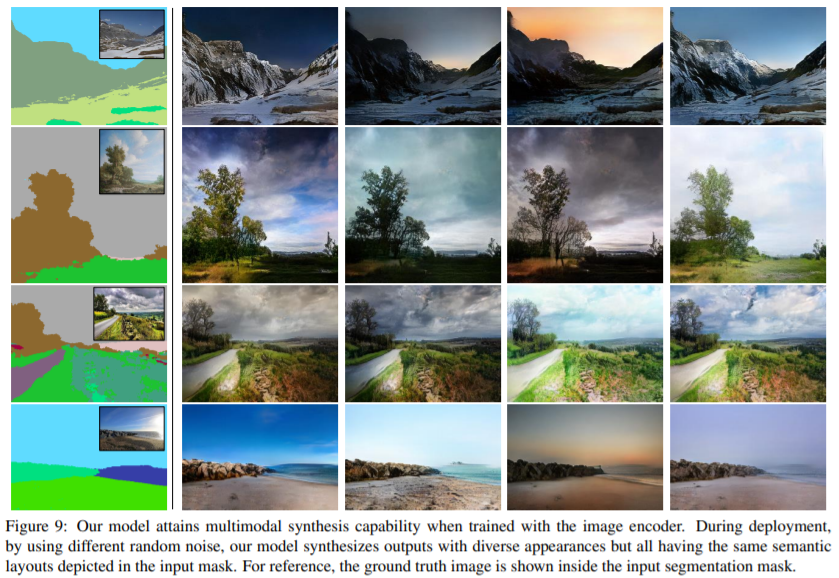

위의 그림 Figure 9는 Flickr Landscape에 대해 multi-modal synthesis를 보여준다. 본 논문에 자세한 모델 구조와 더 많은 결과물들이 있으므로 들어가서 확인해보는 것을 추천한다.